## Sismica a riflessione   
Fisica della terra  
Marco Scuderi  

#### Problem set   

Following a reflection seismic investigation, the geologist who studied the arrival times of the P-wave phases at various geophones (e.g., red dots) obtained the data reported in the table. The table shows the distance from the station in kilometers versus the arrival time of the P-wave phase at the station in seconds.

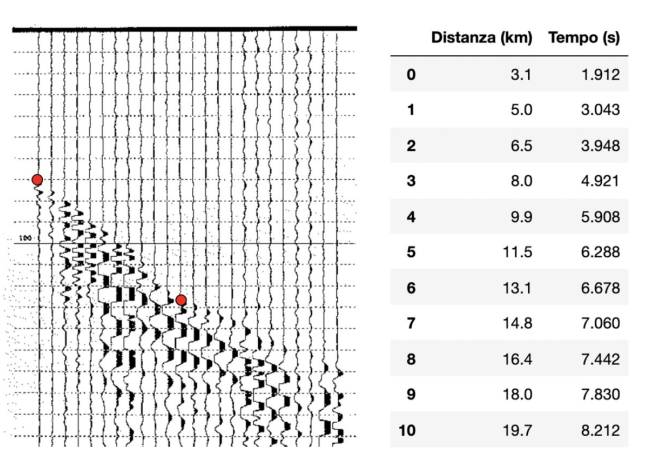

##### What we have to do:   
A) Determinet the P-wave velocity for the two layers.  
Represent the data in a distance vs. time graph and determine if there is a change in velocity, you can follow these steps:

- Plot the data points with distance (x-axis) on one side and time (y-axis) on the other side.
- Examine the graph for any noticeable changes in the slope (steepness) of the line. Changes in slope indicate changes in velocity.
- If you observe distinct segments with different slopes, you can use these segments to estimate the P-wave velocities (Vp) for the two different lithologies. The Vp can be calculated using the formula: Vp = Distance / Time.

B) Determine the depth of the discontinuity. 

#### Import necessary libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

#### Import the data

In [ ]:
df = pd.read_table('data.txt', sep=';' )
df
#df.dtypes

In [ ]:
# for comodity rename the columns 
df.rename(columns= {'Distanza (km)':'Distanza', 'Tempo (s)':'Tempo'}, inplace=True )
#df

#### Visualize data 

In [ ]:
fig = plt.figure()
plt.scatter(df.Distanza,-df.Tempo)
plt.ylabel('Time [s]')
plt.xlabel('Distanza [km]')

Look at the plot and make observations.  
There are two linear  trends that are clearly visible. To find the velocity of the P-wave we can perform a linear regression to the points and look at the slope (expressed in km/s). 

In [ ]:
fit_A = linregress(df.Distanza[0:3],df.Tempo[0:3])
fit_B = linregress(df.Distanza[4:10],df.Tempo[4:10])
fit_A

Now we can represent the fits in a diagram.

In [ ]:
# build two arrays to represent the lines for the direct and refracted wave
x = np.arange(0,30,1)
OD = x*fit_A[0]
OR = x*fit_B[0] + fit_B[1]

In [ ]:
%matplotlib qt
fig = plt.figure()
plt.scatter(df.Distanza,-df.Tempo, c = 'k')
plt.plot(x,-OD, alpha=.5, c = 'r', label= 'Fit onda diretta')
plt.plot(x,-OR, alpha=.5, c = 'b', label= 'Fit onda criticamente rifratta')
plt.xlabel('Distanza (km)', fontsize = 14)
plt.ylabel('Tempo (s)', fontsize = 14)
plt.legend(loc='best')
plt.axvline(x = 0, c = 'k')
plt.axhline(y = 0, c = 'k')

From the slopes of the lines we can calculate the P-wave velocities across the discontinuity.  
v = 1/slope

In [ ]:
# coefficiente angolare delle rette m = 1/v
v1 = 1/fit_A[0]
v2 = 1/fit_B[0]
print('velocity of the first layer: ',v1, '[km/s]')
print('velocity of the second layer: ',v2, '[km/s]')

## Now we calculate the depth of the discontinuity  

### Method 1, we can take advantage of the critical refraction angle ($\theta_c$)

$ sin(\theta_c)= V_{1}/V_{2}$    

$ t_0 = \frac{2 h cos(\theta_c)}{V_1} $  

Remember that $t_0$ is the intercept of the refracted wave

In [ ]:
#to onda criticamente rifratta è fit_B[1], quindi fit_B[1]=2*hcosic/v1
#pertanto  h = fit_B[1]*v1/2*cosic
# ic = v1/v2
#sinic = v1/v2
ic = np.arcsin(v1/v2)

h = fit_B[1]*v1/(2*np.cos(ic))
print('The depth of the discontinuity is: ', h, '[km]')

### Method 2, measure x<sub>cross</sub> in the graph and use the relation: 

\begin{equation}
𝑥_{𝑐𝑟oss}=2h\sqrt{\frac{(V_{2}+V_{1})}{(V_{2}−V_{1} )}}
\end{equation}


In [ ]:
# ricavo xcross dal grafico
xc = 9.8538
h = xc /(2*np.sqrt(((v2+v1)/(v2-v1))))
print('The depth of the discontinuity is: ', h, '[km]')

A better and more accurate way is to find the x<sub>cross</sub> using a math/programming approach

In [ ]:
# to achive better accuracy we increase the density of the points 
x = np.arange(0,30,0.1)
OD = x*fit_A[0]
OR = x*fit_B[0] + fit_B[1]

In [ ]:
# we use numpy to retrieve the index of the position where two lines cross
idx = np.argwhere(np.diff(np.sign(OD - OR))).flatten()

In [ ]:
fig = plt.figure()
# plot the results 
plt.plot(x[idx], -OD[idx], 'rD')
plt.plot(x[idx], -OR[idx], 'gD')
# plot the original data 
plt.scatter(df.Distanza,-df.Tempo, c = 'k')
plt.plot(x,-OD, alpha=.5, c = 'r', label= 'Fit onda diretta')
plt.plot(x,-OR, alpha=.5, c = 'b', label= 'Fit onda criticamente rifratta')
plt.xlabel('Distanza (km)', fontsize = 14)
plt.ylabel('Tempo (s)', fontsize = 14)
plt.legend(loc='best')
plt.axvline(x = 0, c = 'k')
plt.axhline(y = 0, c = 'k')
plt.show()

print(x[idx])

In [ ]:
h = x[idx] /(2*np.sqrt(((v2+v1)/(v2-v1))))
print('The depth of the discontinuity is: ', h, '[km]')

### Onda riflessa

\begin{equation}
T_{riflessa}={\frac{1}{V_{1}}}\sqrt{4h^2 + x^2}
\end{equation}

In [ ]:
Rif = (1/v1)*np.sqrt(4*h**2 + x**2)

In [ ]:
%matplotlib qt
plt.scatter(df.Distanza,-df.Tempo, c = 'k')
plt.plot(x,-OD, alpha=.5, c = 'r', label= 'Fit onda diretta')
plt.plot(x,-OR, alpha=.5, c = 'b', label= 'Fit onda criticamente rifratta')
plt.plot(x,-Rif, alpha=.5, c = 'k', label= 'Onda riflessa')
plt.xlabel('Distanza', fontsize = 14)
plt.ylabel('Tempo', fontsize = 14)
plt.legend(loc='best')
plt.axvline(x = 0, c = 'k')
plt.axhline(y = 0, c = 'k')